<a href="https://colab.research.google.com/github/gabrielfea/trabalhos_cd/blob/main/CD_Tarefa_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gabriel Vinicius Boin Freitas

<b>1-) No conjunto de dados "Dados-Tarefa-02.csv" aplique os métodos (a) k-Means, (b) k-Medoids, (c) DBSCAN e (d) BIRCH.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = pd.read_csv('/content/drive/MyDrive/exec1/Dados-Tarefa-02.csv')

In [5]:
data.head()

,Index,d1,d2
0,0,1.225160,-0.951731
1,1,1.016304,-1.725175
2,2,0.335340,-1.724896
3,3,1.786348,-1.782653
4,4,1.016751,1.062569


In [10]:
data.describe()

,Index,d1,d2
count,1000.000000,1000.000000,1000.000000
mean,499.500000,-0.000778,-0.971083
std,288.819436,1.157922,1.109568
min,0.000000,-2.933792,-4.887411
25%,249.750000,-1.041307,-1.686809
50%,499.500000,0.163985,-0.986916
75%,749.250000,1.015676,-0.258486
max,999.000000,2.350330,3.981227


In [6]:
#Standarizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


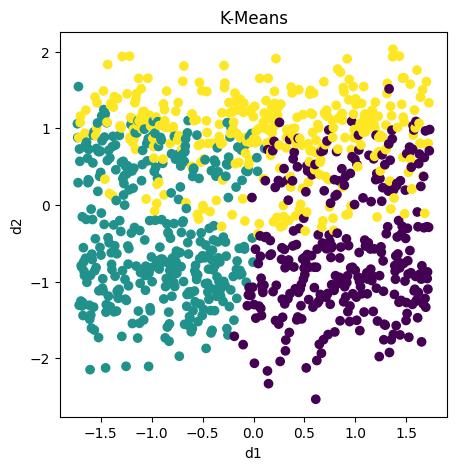

In [29]:
#Kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_scaled)
#Gráfico
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.title.set_text('K-Means')
ax.set_xlabel('d1')
ax.set_ylabel('d2')
plt.scatter(data_scaled[:, 0], data_scaled[:, 1] ,c=kmeans.labels_)
plt.show()


In [48]:
!pip install scikit-learn-extra

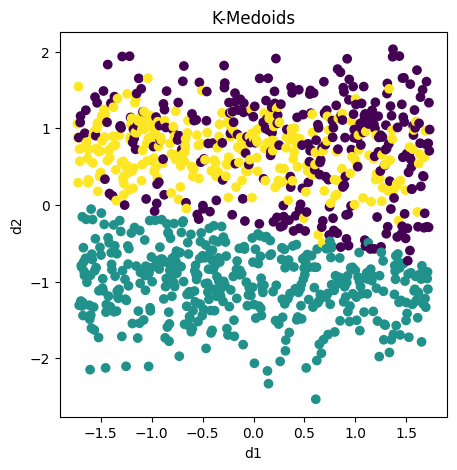

In [41]:
#K-medoids
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(data_scaled)
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.title.set_text('K-Medoids')
ax.set_xlabel('d1')
ax.set_ylabel('d2')
plt.scatter(data_scaled[:, 0], data_scaled[:, 1] ,c=kmedoids.labels_)
plt.show()

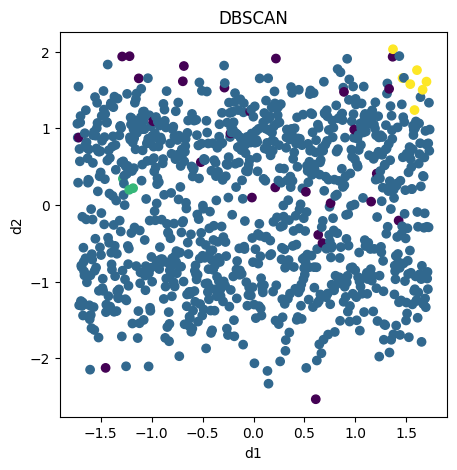

In [42]:
#DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(data_scaled)
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.title.set_text('DBSCAN')
ax.set_xlabel('d1')
ax.set_ylabel('d2')
plt.scatter(data_scaled[:, 0], data_scaled[:, 1] ,c=dbscan.labels_)
plt.show()

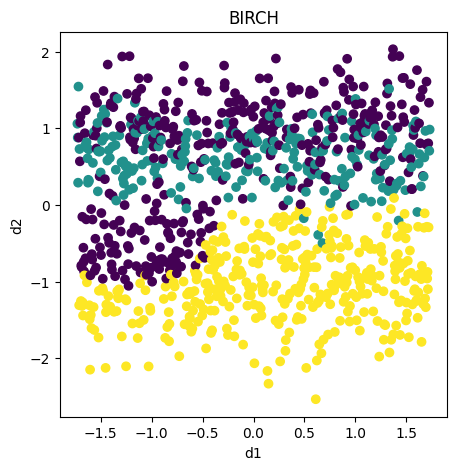

In [43]:
#BIRCH
from sklearn.cluster import Birch
birch = Birch(n_clusters=3).fit(data_scaled)
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.title.set_text('BIRCH')
ax.set_xlabel('d1')
ax.set_ylabel('d2')
plt.scatter(data_scaled[:, 0], data_scaled[:, 1] ,c=birch.labels_)
plt.show()


<b>2-) Aplicar Elbow e Silhouette para encontrar o valor de k para os algoritmos k-Means (a) e k-Medoids (b). Qual o melhor valor de k (i.e., número de clusters) para estes casos?


In [49]:
#Elbow
!pip install yellowbrick
!pip install plotly

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

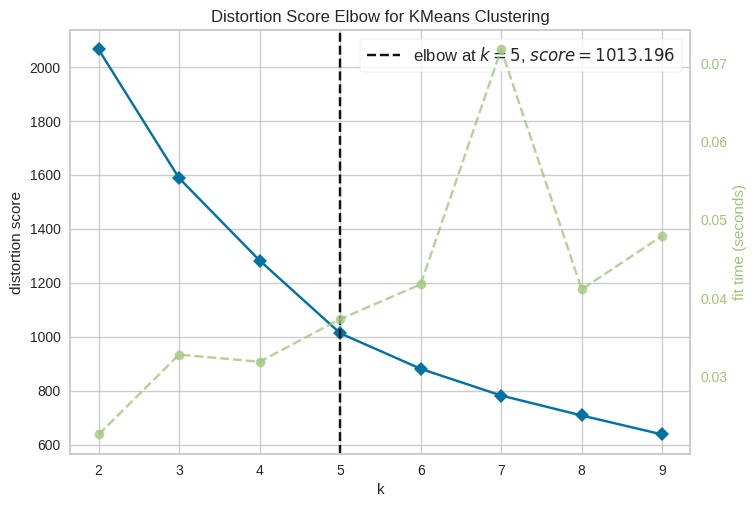

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(data_scaled)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


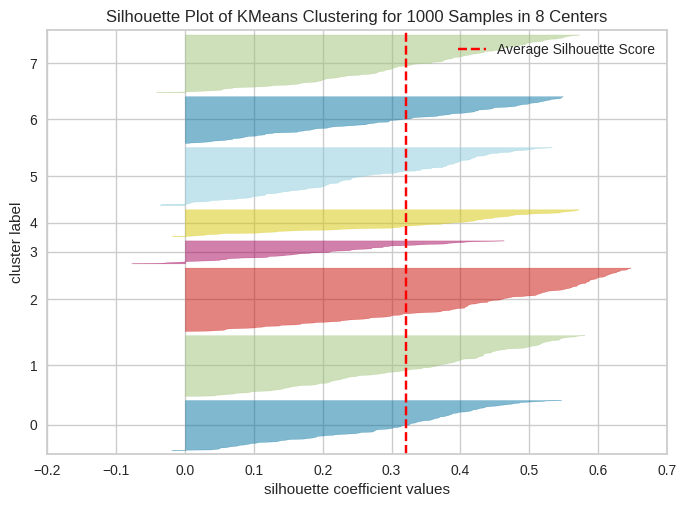

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1000 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [53]:
from yellowbrick.cluster import SilhouetteVisualizer
km = KMeans(random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(data_scaled)
visualizer.show()

Pela análise da Silhoueta, poderia usar 6 clusters, pelo método Elbow, 5. Vamos tentar com 6.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


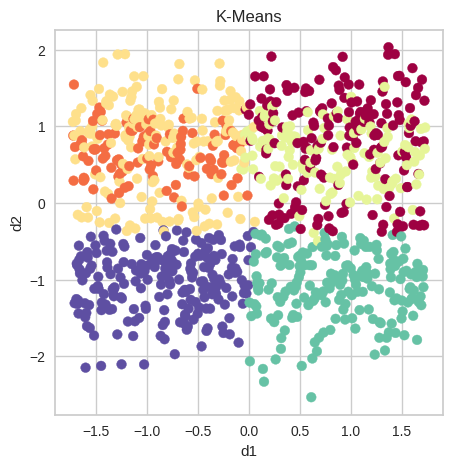

In [64]:
#Kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0).fit(data_scaled)
#Gráfico
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.title.set_text('K-Means')
ax.set_xlabel('d1')
ax.set_ylabel('d2')
plt.scatter(data_scaled[:, 0], data_scaled[:, 1] ,c=kmeans.labels_, cmap="Spectral_r")
plt.show()

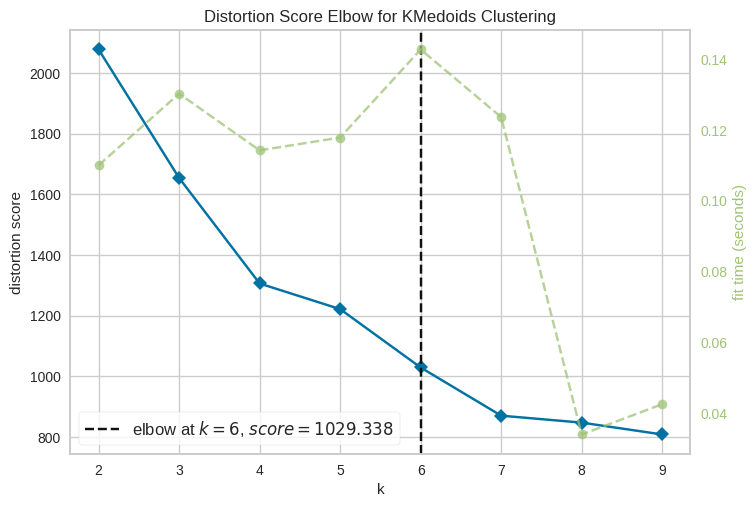

<Axes: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
from yellowbrick.cluster import KElbowVisualizer
kmd = KMedoids(random_state=42)
visualizer = KElbowVisualizer(kmd, k=(2,10))
visualizer.fit(data_scaled)
visualizer.show()

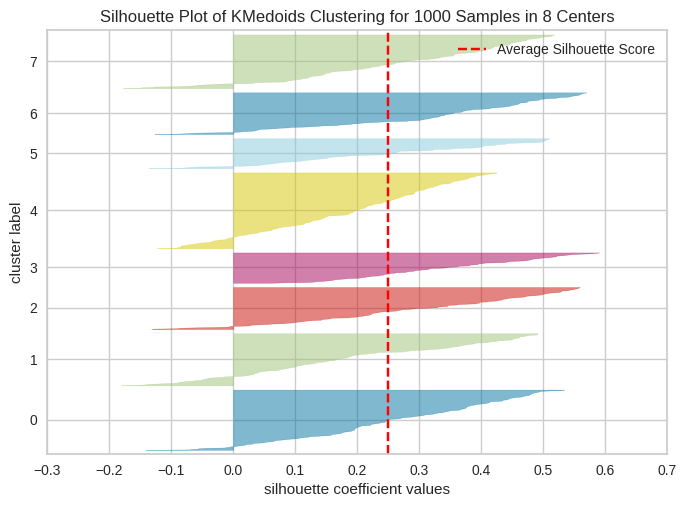

<Axes: title={'center': 'Silhouette Plot of KMedoids Clustering for 1000 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [66]:
from yellowbrick.cluster import SilhouetteVisualizer
kmd = KMedoids(random_state=42)
visualizer = SilhouetteVisualizer(kmd, colors='yellowbrick')
visualizer.fit(data_scaled)
visualizer.show()

Parece interessante se utilizar 7 agrupamentos no k-medoid. Vamos tentar:

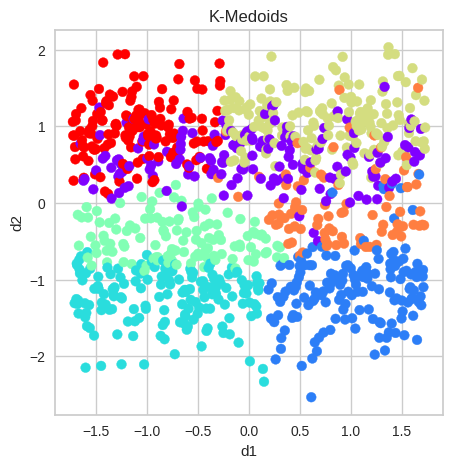

In [68]:
#K-medoids
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=7, random_state=0).fit(data_scaled)
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.title.set_text('K-Medoids')
ax.set_xlabel('d1')
ax.set_ylabel('d2')
plt.scatter(data_scaled[:, 0], data_scaled[:, 1] ,c=kmedoids.labels_, cmap="rainbow")
plt.show()

<b> 3-) Faça gráficos com os dados, mostrando em cores diferentes cada cluster e seu centroide (no k-Means)/Objeto central (K-Metoids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


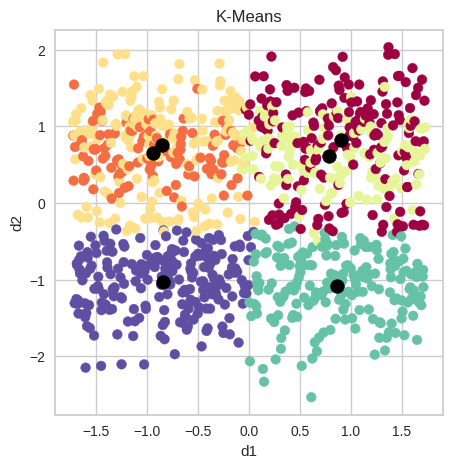

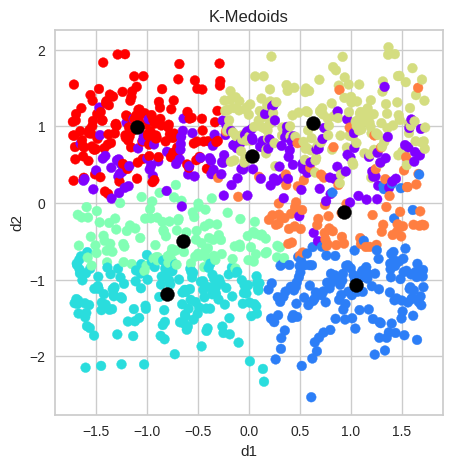

In [86]:
#Kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0).fit(data_scaled)
#Gráfico
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.title.set_text('K-Means')
ax.set_xlabel('d1')
ax.set_ylabel('d2')
plt.scatter(data_scaled[:, 0], data_scaled[:, 1] ,c=kmeans.labels_, cmap="Spectral_r")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black')
plt.show()

#K-medoids
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=7, random_state=0).fit(data_scaled)
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.title.set_text('K-Medoids')
ax.set_xlabel('d1')
ax.set_ylabel('d2')
plt.scatter(data_scaled[:, 0], data_scaled[:, 1] ,c=kmedoids.labels_, cmap="rainbow")
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s=100, c='black')
plt.show()

Gráficos imnpressos com suas respectivas marcações.